> # Chapter02 - Overfitting and Regularization
***

     Boston Extended-set

In [ ]:
import sys 
import os
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz

     |████████████████████████████████| 31.2 MB 1.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Overfitting

In [ ]:
X_data, y_data = mglearn.datasets.load_extended_boston()



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [ ]:
pd.DataFrame(X_data)  # 데이터프레임 안에 위에서 만든 X_data 넣기

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,...,0.026936,0.146662,0.162090,0.035958,0.798551,0.882553,0.195787,0.975392,0.216382,0.048003
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.033286,0.798551,0.893617,0.181239,1.000000,0.202815,0.041134
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.017707,0.798551,0.893617,0.096414,1.000000,0.107892,0.011641
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,...,0.026936,0.146662,0.162694,0.021512,0.798551,0.885843,0.117127,0.982677,0.129930,0.017180


### DataFrame 을 train test 로 나눈다 & Linear Regression library 를 사용하여 W 값 예측

### Shuffle data and Split train, Test

##### 1. Shuffle

In [ ]:
N = X_data.shape[0]  # n은 데이터를 거꾸로..?

In [ ]:
np.random.seed(3)

idx = np.random.permutation(N)
print(len(idx))

506


In [ ]:
shuffle_X = X_data[idx]
shuffle_y = y_data[idx]

##### 2. Split train test

In [ ]:
# 3:1 의 비율로 train test 를 나눔
n = int(N * (3/4))

# train data
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

In [ ]:
# test data
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0] + X_test.shape[0])

(379, 104)
(127, 104)
506


### Perform Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [ ]:
# Loss function
# MSE : 실제값이랑 예측값의 차를 구하고 제곱해서 평균 구하는 것.
# MSE는 손실함수 중 하나 
# 손실함수는 신경망 성능이 안 좋은 정도를 나타내며, 수치가 낮을수록 훈력 데이터를 잘 처리하는 것이다.
def MSE(real, predict):
    return ((real - predict)**2).mean()

### model.score → R square

모델의 성능을 평가하기 위해 R^2 (R square) 를 이용

$
\begin{align}
R^{2} = 1 - {\sum(오차^2) \over \sum(편차^2)}
\end{align}
$

오차 = 실제값 - 예측값<br>
편차 = 실제값 - 평균값<br>

예측을 완벽하게 해서 실제값 = 예측값 이라면? → R^2 = 1<br>
예측을 모두 평균값으로 했다면? → R^2 = 0 (쓸 수 없는 모델)

##### R^2 과 MSE 를 구해보자

In [ ]:
print("Training R^2 score:{:0.2f}".format(reg.score(X_train, y_train)))  # 거의 1에 근접(1에 가까울수록 좋음)  # 오차가 없을수록 1에 가까운 값을 가짐 # 값이 0인경우 데이터의 평균값을 출력하는 직선모델을 의미
print("Test R^2 score:{:0.2f}".format(reg.score(X_test, y_test)))
print('Mean squared error:{:0.2f}'.format(MSE(y_test, y_pred)))  # 특이값이 존재하면 수치가 많이 늘어난다. (훈련ㄷ이터 잘 처리x)

Training R^2 score:0.94
Test R^2 score:0.51
Mean squared error:40.31


##### W 의 값은?

가장 높은 W 값과 가장 낮은 W 값을 3개씩 가져와보자

In [ ]:
W = reg.coef_

In [ ]:
W

array([-8.44950145e+02, -1.76834889e+01, -1.17545820e+02,  1.54058132e+01,
        1.62344309e+01,  6.08485359e+01,  3.71800946e+01, -6.10377613e+01,
        1.42292720e+01,  5.89778062e+01,  7.46584684e+00,  1.62007982e+01,
        4.29061739e+01,  3.80641351e+01,  3.96210603e+03,  1.80086065e+03,
        1.11510407e+02, -1.26305238e+02,  2.15437784e+02, -5.78437110e+01,
       -2.79199772e+02,  7.09768258e+01, -1.22421789e+03,  8.55620167e+02,
        8.87904462e+00,  8.42985360e+01, -7.33916441e+00, -3.30186205e+01,
       -1.38231616e+00, -5.09364692e+01,  4.42720941e+00, -1.66241010e+00,
       -1.14366170e+01, -2.69159518e+01,  4.22161482e+01, -1.31568353e+01,
        3.75492685e+01, -1.40521722e+01,  3.08285655e+01,  3.51809840e+00,
       -3.32196345e+01,  4.87706624e+01,  2.39619970e+01,  2.39456601e+01,
       -1.31919678e+01, -3.88404066e-01, -1.57656669e+00,  6.36249357e+01,
       -6.04154167e+00,  1.54058132e+01, -1.80451963e+01, -4.04942131e+01,
        6.16823123e+00,  

In [ ]:
top_3_idx = np.argsort(W)[-3:]
bottom_3_idx = np.argsort(W)[:3]

In [ ]:
np.argsort([8, 15, 12, 1, 56, 48, 2])  # 제일 작은 수 1은 3번 인덱스에 위치 / np.argsort는 제일 작은 수의 인덱스 번호를 출력

array([3, 6, 0, 2, 1, 5, 4])

In [ ]:
top_3_values = [W[i] for i in top_3_idx]  # 인덱스 하나씩 가져와서 i에 넣고 W에 있는 위치 뽑아온 것..
bottom_3_values = [W[i] for i in bottom_3_idx]

In [ ]:
print("Linear Regression의 가장 높은 W 의 값 3개 =>",["{:0.2f}".format(x) for x in top_3_values])
print("Linear Regression의 가장 낮은 W 의 값 3개 =>",["{:0.2f}".format(x) for x in bottom_3_values])

Linear Regression의 가장 높은 W 의 값 3개 => ['855.62', '1800.86', '3962.11']
Linear Regression의 가장 낮은 W 의 값 3개 => ['-1224.22', '-844.95', '-279.20']


In [ ]:
### Optional (함수처리)

def get_top_bottom(data, count):
    top_idx = np.argsort(data)[-count:]
    bottom_idx = np.argsort(data)[:count]

    top_values = [data[i] for i in top_idx]
    bottom_values = [data[i] for i in bottom_idx]
    
    return top_values, bottom_values

## Regularization
<br>
Training Set 의 Score 과 Test Set 의 Score 가 너무 차이가 난다<br>
 → Overfitting 이다<br>
 → Regularization 필요

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge1 = Ridge()
ridge1.fit(X_train, y_train)
ridge1_pred = ridge1.predict(X_test)

In [ ]:
print("Training score:{:0.2f}".format(ridge1.score(X_train, y_train)))
print("Test score:{:0.2f}".format(ridge1.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, ridge1_pred)))  # MSE가 위에 보다 줄어들음(값이 작을수록 좋은 것)

Training score:0.87
Test score:0.81
Mean squared error:15.81


##### W values?

In [ ]:
W = ridge1.coef_

In [ ]:
W

array([-1.25351334e+00, -1.31133983e+00, -3.00027405e-01,  2.49648054e-01,
        7.40696817e-01,  8.18475566e+00,  1.62535201e-01, -5.17889521e+00,
        4.26930666e+00, -9.90039621e-01, -1.57875938e+00,  1.22317955e+00,
       -3.79080335e+00, -3.90479310e-02,  1.32217221e-04, -7.74070757e-01,
        7.85227675e-01, -1.40598817e+00, -1.33610436e+00, -8.73727227e-01,
       -2.66834988e-01, -1.59387389e+00, -1.34181362e+00, -1.21066448e+00,
       -1.27544557e+00, -3.32123765e-01,  2.28299234e+00, -2.40688431e+00,
        1.82476379e+00,  1.55451965e-01,  4.11638067e+00, -1.50125932e+00,
        2.89848705e-01,  3.32800119e-02, -5.14748778e-01,  1.91958112e-01,
       -1.00326350e+00, -2.07880170e+00,  2.50045930e+00,  2.66804799e+00,
        7.66910164e-01, -3.02910532e+00,  3.48177938e+00, -3.61937657e+00,
        1.59368106e+00,  2.70550403e+00, -2.73898604e+00,  3.28348521e-01,
       -3.23588367e+00,  2.49648054e-01, -4.67888933e+00, -4.05814598e+00,
        2.84437537e+00, -

In [ ]:
top_values, bottom_values = get_top_bottom(W,3)

print("가장 높은 W 의 값 3개 =>",["{:0.2f}".format(x) for x in top_values])
print("가장 낮은 W 의 값 3개 =>",["{:0.2f}".format(x) for x in bottom_values])

가장 높은 W 의 값 3개 => ['8.92', '10.46', '17.36']
가장 낮은 W 의 값 3개 => ['-9.52', '-8.48', '-7.32']


##### W 의 크기가 확연하게 줄었음을 확인 할 수 있다

#### Lambda (alpha 의 크기를 바꿔보자)

### 0.1, 0.5, 10

In [ ]:
ridge01 = Ridge(alpha = 0.1)

ridge01.fit(X_train, y_train)

ridge_pred01 = ridge01.predict(X_test)

print("Training score:{:0.2f}".format(ridge01.score(X_train, y_train)))
print("Test score:{:0.2f}".format(ridge01.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, ridge_pred01)))

Training score:0.91
Test score:0.85
Mean squared error:12.56


In [ ]:
ridge05 = Ridge(alpha = 0.5)

ridge05.fit(X_train, y_train)

ridge_pred05 = ridge05.predict(X_test)

print("Training score:{:0.2f}".format(ridge05.score(X_train, y_train)))
print("Test score:{:0.2f}".format(ridge05.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, ridge_pred05)))

Training score:0.88
Test score:0.83
Mean squared error:14.17


* alpha값을 높이게 되면 계수가 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다.

In [ ]:
ridge10 = Ridge(alpha = 10)

ridge10.fit(X_train, y_train)

ridge_pred10 = ridge10.predict(X_test)

print("Training score:{:0.2f}".format(ridge10.score(X_train, y_train)))
print("Test score:{:0.2f}".format(ridge10.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, ridge_pred10)))

Training score:0.77
Test score:0.71
Mean squared error:24.04


### Score  Plotting

In [ ]:
# alpha 값을 연속적으로 정의
alpha = []

for i in range(1,101,1):
    alpha.append(i/10)

In [ ]:
train_score = []
test_score = []

for i in alpha:
    ridge = Ridge(alpha = i)
    ridge.fit(X_train, y_train)

    ridge_train_score = ridge.score(X_train, y_train)
    ridge_test_score = ridge.score(X_test, y_test)

    train_score.append(ridge_train_score)
    test_score.append(ridge_test_score)

In [ ]:
1e+1, 1e-2

(10.0, 0.01)

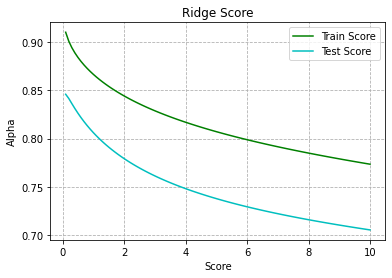

In [ ]:
plt.grid(linestyle='--')

plt.plot(alpha,train_score, color="g", label="Train Score")
plt.plot(alpha,test_score, color="c", label="Test Score")

plt.title("Ridge Score")
plt.legend(loc='best')

plt.xlabel("Score")
plt.ylabel("Alpha")

plt.show()

### W 의 크기 확인

다음의 그림으로 w 값의 변화량을 알 수 있다(w가 얼마나 퍼져있는지 확인)<br>
alpha 값이 클수록 규제 강도가 강해지기 때문에 w 의 절대값이 크기가 작아짐을 알 수 있다.<br>
https://matplotlib.org/api/markers_api.html 에서 그래프의 dot 모양을 확인 할 수 있다

Text(0, 0.5, 'W values')

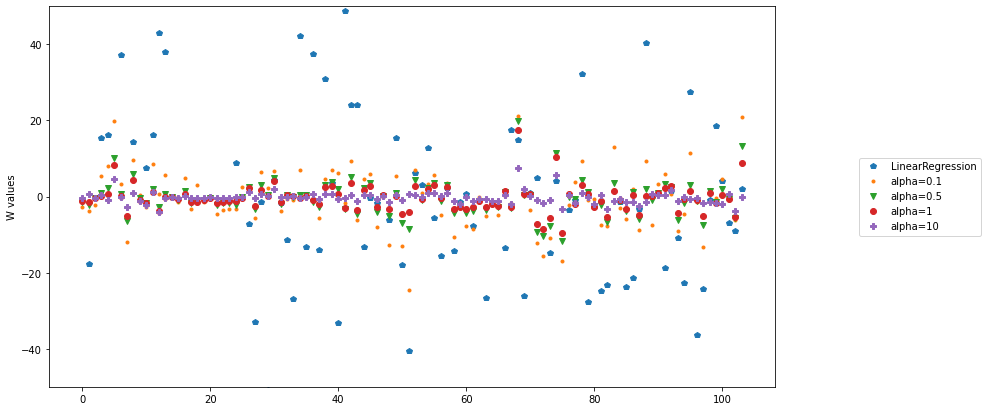

In [ ]:
# alpha값이 커질수록 선형적으로 변한다.(주석처리해가면서 확인해보면 보일것)
plt.figure(figsize=(13,7))

plt.plot(reg.coef_, 'p', label="LinearRegression") # o = 원    # w가 엄청 퍼져있음
plt.plot(ridge01.coef_, '.', label="alpha=0.1") # v = 아래 삼각형
plt.plot(ridge05.coef_, 'v', label="alpha=0.5") # v = 아래 삼각형
plt.plot(ridge1.coef_, 'o', label="alpha=1") # s = 사각형
plt.plot(ridge10.coef_, 'P', label="alpha=10") # ^ = 윗 삼각형

plt.ylim(-50, 50) # y 축의 범위

plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5)) # bbox_to_anchor=(1.2, 0.5) <= 레전드의 위치

plt.ylabel("W values")

### Lasso Regression

Ridge 를 했으니 당연히 Lasso 도 해주어야한다!

In [ ]:
from sklearn.linear_model import Lasso

lasso1 = Lasso()

lasso1.fit(X_train, y_train)
lasso1_pred = lasso1.predict(X_test)

In [ ]:
print("Training score:{:0.2f}".format(lasso1.score(X_train, y_train)))
print("Test score:{:0.2f}".format(lasso1.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, lasso1_pred)))

print("Features:", np.sum(lasso1.coef_ != 0)) # lasso.coef_ 는 w 이므로 w 의 값이  0이 아닌 것만 np.sum 으로 카운트

Training score:0.24
Test score:0.23
Mean squared error:62.44
Features: 4


In [ ]:
W = lasso1.coef_
W   # 대부분이 0값

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -4.55880522, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

### 0.01, 0.001, 0.0001

In [ ]:
lasso001 = Lasso(alpha = 0.01)

lasso001.fit(X_train, y_train)

lasso_pred001 = lasso001.predict(X_test)

print("Training score:{:0.2f}".format(lasso001.score(X_train, y_train)))
print("Test score:{:0.2f}".format(lasso001.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, lasso_pred001)))

print("Features:", np.sum(lasso001.coef_ != 0)) # lasso.coef_ 는 w 이므로 w 의 값이  0이 아닌 것만 np.sum 으로 카운트

Training score:0.87
Test score:0.82
Mean squared error:15.04
Features: 31


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.617e+00, tolerance: 3.231e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
lasso0001 = Lasso(alpha = 0.001)

lasso0001.fit(X_train, y_train)

lasso_pred0001 = lasso0001.predict(X_test)

print("Training score:{:0.2f}".format(lasso0001.score(X_train, y_train)))
print("Test score:{:0.2f}".format(lasso0001.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, lasso_pred0001)))

print("Features:", np.sum(lasso0001.coef_ != 0)) # lasso.coef_ 는 w 이므로 w 의 값이  0이 아닌 것만 np.sum 으로 카운트

Training score:0.92
Test score:0.83
Mean squared error:13.75
Features: 78


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+03, tolerance: 3.231e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
lasso00001 = Lasso(alpha = 0.0001)

lasso00001.fit(X_train, y_train)

lasso_pred00001 = lasso00001.predict(X_test)

print("Training score:{:0.2f}".format(lasso00001.score(X_train, y_train)))
print("Test score:{:0.2f}".format(lasso00001.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, lasso_pred00001)))

print("Features:", np.sum(lasso00001.coef_ != 0)) # lasso.coef_ 는 w 이므로 w 의 값이  0이 아닌 것만 np.sum 으로 카운트

Training score:0.93
Test score:0.82
Mean squared error:14.89
Features: 101


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+03, tolerance: 3.231e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# alpha 값을 연속적으로 정의
alpha = []

for i in range(1,101,1):
    alpha.append(i/100)

In [ ]:
train_score = []
test_score = []

for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,y_train)
    
    lasso_train_score = lasso.score(X_train, y_train)
    lasso_test_score = lasso.score(X_test, y_test)

    train_score.append(lasso_train_score)
    test_score.append(lasso_test_score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.617e+00, tolerance: 3.231e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


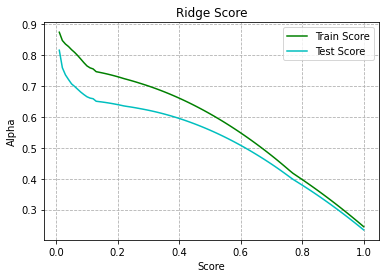

In [ ]:
plt.grid(linestyle='--')

plt.plot(alpha,train_score, color="g", label="Train Score")
plt.plot(alpha,test_score, color="c", label="Test Score")

plt.title("Ridge Score")
plt.legend(loc='best')

plt.xlabel("Score")
plt.ylabel("Alpha")

plt.show()

Text(0, 0.5, 'W values')

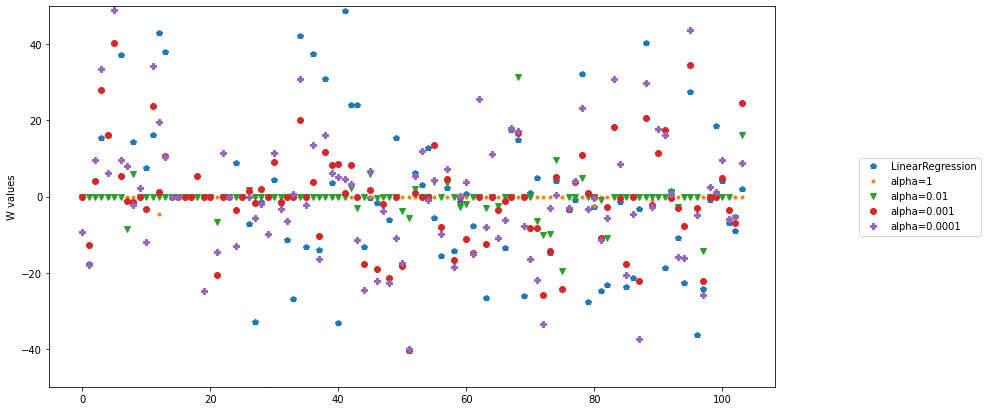

In [ ]:
# alpha=1 이면 규제가 굉장히 커지므로 대부분의 w 값이 0 으로 수렴하게 된다
# 반대로 alpha 값이 작아지면 작아질수록 w 값이 점점 규제를 받지 않아 LinearRegression 과 같은 분포를 띄게 된다

plt.figure(figsize=(13,7))

plt.plot(reg.coef_, 'p', label="LinearRegression") # o = 원
plt.plot(lasso1.coef_, '.', label="alpha=1") # v = 아래 삼각형
plt.plot(lasso001.coef_, 'v', label="alpha=0.01") # v = 아래 삼각형
plt.plot(lasso0001.coef_, 'o', label="alpha=0.001") # s = 사각형
plt.plot(lasso00001.coef_, 'P', label="alpha=0.0001") # ^ = 윗 삼각형

plt.ylim(-50, 50) # y 축의 범위

plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5)) # bbox_to_anchor=(1.2, 0.5) <= 레전드의 위치

plt.ylabel("W values")